In [74]:
# Reading the Data
import pandas as pd
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It seems that there are no missing values in our data. Great, let's see the distribution of data:

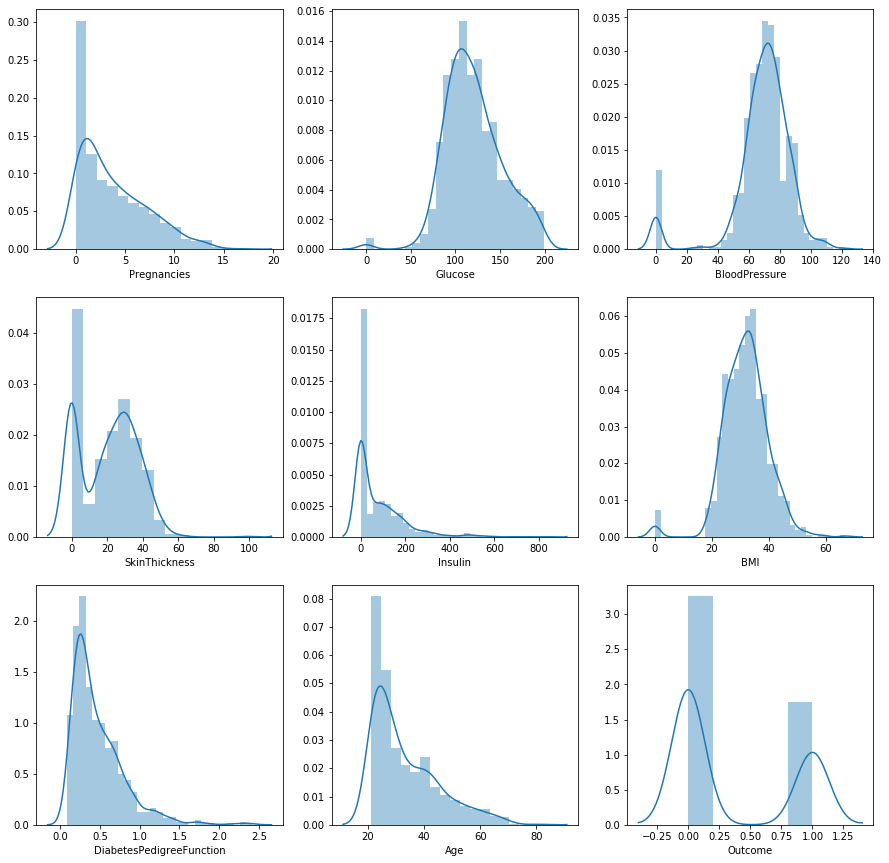

In [75]:
# let's see how data is distributed for every column
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,15))
plotnumber=1
for column in data:
    if plotnumber <= 9:    # as there are 9 columns in the data
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
    

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [76]:
# replacing zero values with the mean of the column
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

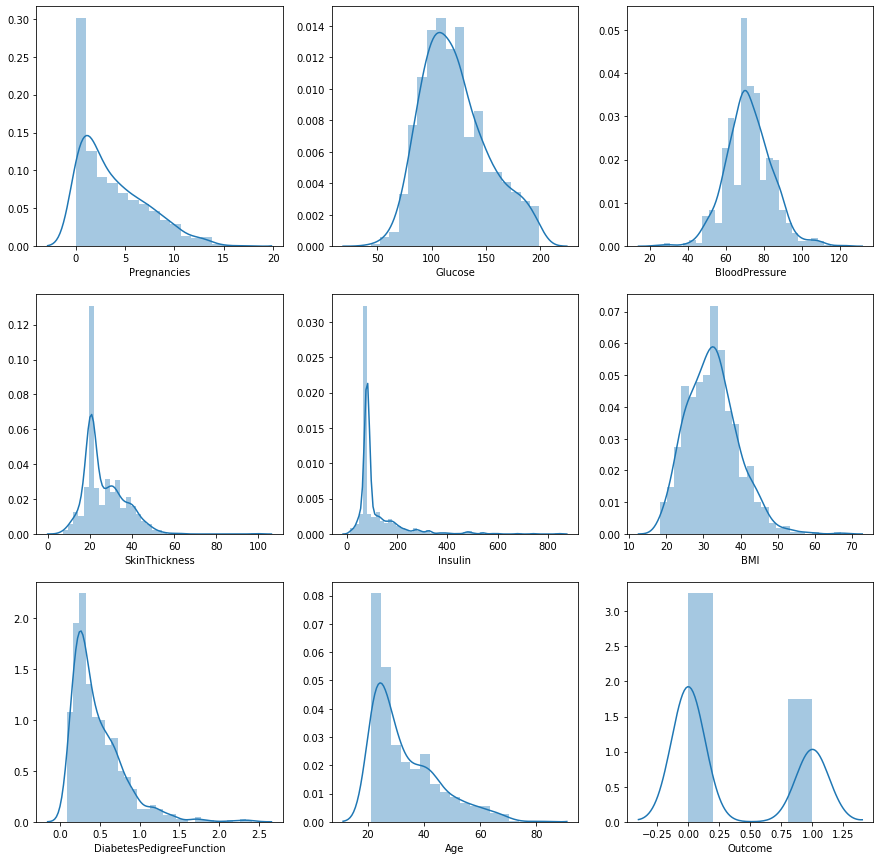

In [77]:
# let's see how data is distributed for every column
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,15))
plotnumber=1
for column in data:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1

Now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns. Let's deal with them.

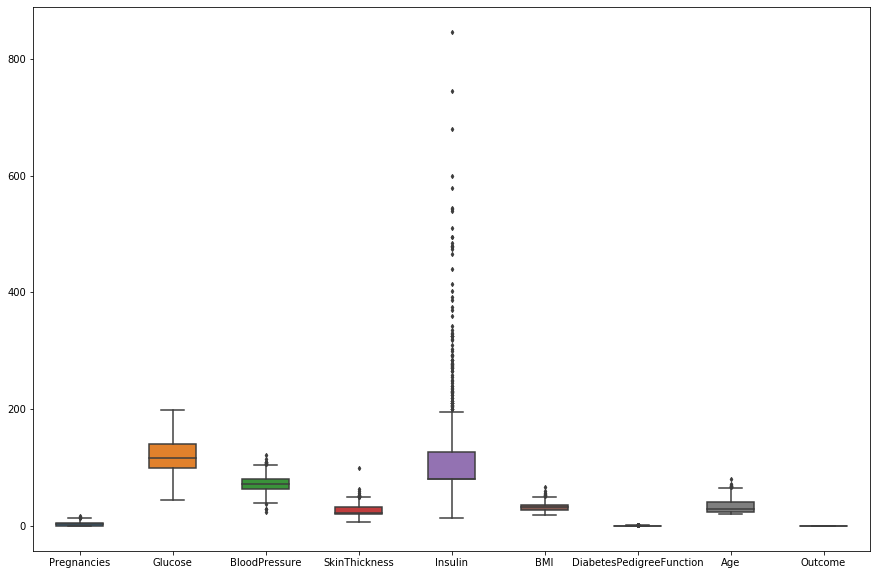

In [20]:
ax1,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [22]:
# we are removing the top 2% data from the Pregnancies column
data1=data['Pregnancies'].quantile(0.98)
data_cleaned=data[data['Pregnancies'] < data1]

In [23]:
# we are removing the top 1% data from the BMI column
data1=data_cleaned['BMI'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['BMI'] < data1]

In [24]:
# we are removing the top 1% data from the SkinThickness column
data1 = data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['SkinThickness'] < data1]

In [25]:
# we are removing the top 5% data from the Insulin column
data1 = data_cleaned['Insulin'].quantile(0.95)
data_cleaned  = data_cleaned[data_cleaned['Insulin'] < data1]

In [26]:
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data1 = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction'] < data1]

In [27]:
# we are removing the top 1% data from the Age column
data1 = data_cleaned['Age'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['Age'] < data1]

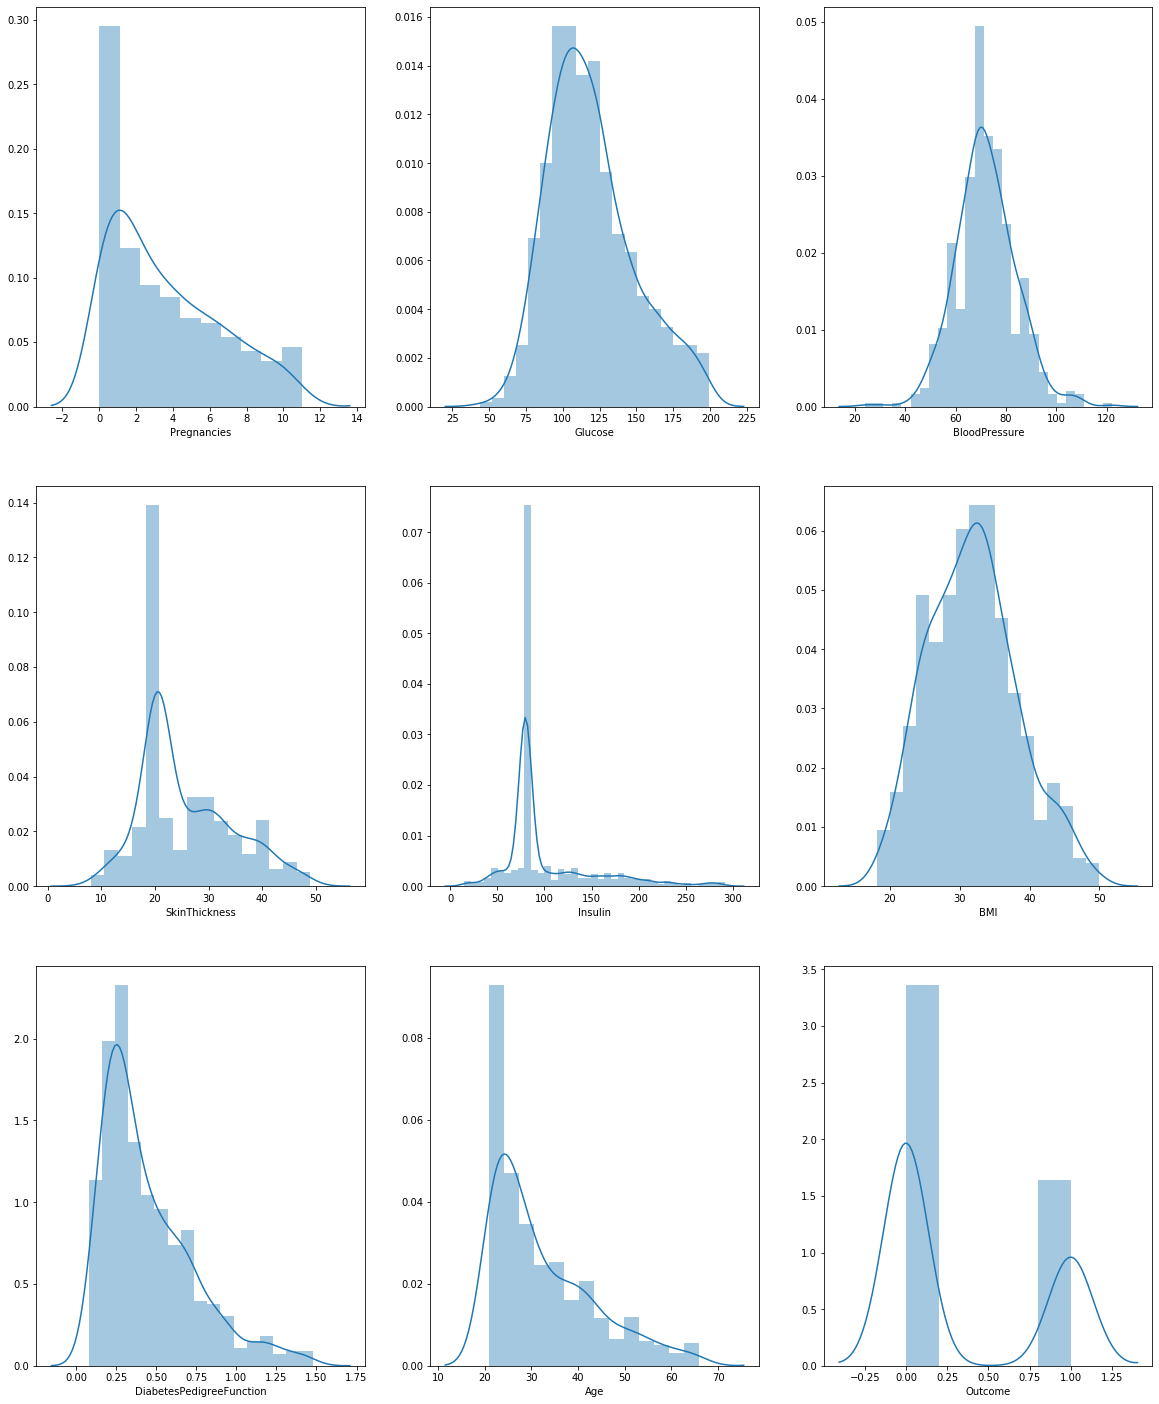

In [31]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25))
plotnumber=1
for column in data_cleaned:
    if plotnumber <=9:
        sub1=plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column)
    plotnumber +=1
    

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

In [32]:
x=data_cleaned.drop('Outcome',axis=1)
y=data_cleaned['Outcome']

Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.

In [37]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [42]:
x_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

 now we will check for multicollinearity using VIF(Variance Inflation factor)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25)

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\kapasiya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred=lr.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8165680473372781

In [62]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[104,   6],
       [ 25,  34]], dtype=int64)

In [63]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [64]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8165680473372781

In [65]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9454545454545454

In [66]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8062015503875969

In [67]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8702928870292886

In [68]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7608628659476118

ROC

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

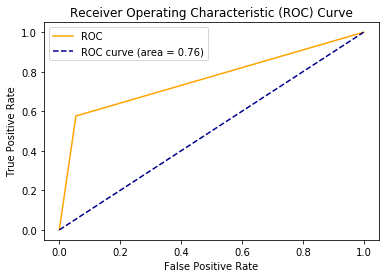

In [73]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()